In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Trouser


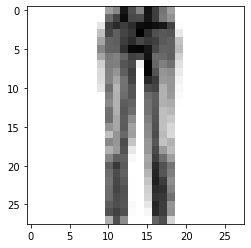

In [7]:
n = 6666
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

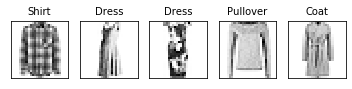

In [8]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [9]:
x_train = x_train/255
y_train = y_train/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape(60000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
x_test = x_test.reshape(10000, 784)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)

In [16]:
y_test = to_categorical(y_test, 10)

In [17]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(88, input_dim = 784, activation='relu'))
model.add(Dense(88, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 組裝神經網路

In [21]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                890       
Total params: 77,802
Trainable params: 77,802
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0035 - accuracy: 0.9959
Epoch 2/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.0193e-04 - accuracy: 1.0000
Epoch 3/20
60000/60000 [==============================] - 2s 26us/sample - loss: 1.0456e-04 - accuracy: 1.0000
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 6.9311e-05 - accuracy: 1.0000
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 5.1354e-05 - accuracy: 1.0000
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 4.0567e-05 - accuracy: 1.0000
Epoch 7/20
60000/60000 [==============================] - 2s 25us/sample - loss: 3.3421e-05 - accuracy: 1.0000
Epoch 8/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.8347e-05 - accuracy: 1.0000
Epoch 9/20
60000/60000 [==============================] - 1s 24us/sample - loss: 2.4565e-05 -

# 成果

In [24]:
result = model.predict_classes(x_test)

In [25]:
result[256]

0

神經網路預測是: T-shirt/top


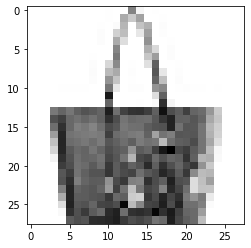

In [26]:
n = 256
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')